<a href="https://colab.research.google.com/github/DomenicoArmillotta/Symbolic_project-Hybrid_NA_DNN/blob/main/Symbolic_project_Hybrid_NA_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#input
# Dati di input standard
data = np.array([[0, 2.5584],
                 [0.5000, 2.6882],
                 [1.0000, 2.9627],
                 [1.5000, 3.2608],
                 [2.0000, 3.6235],
                 [2.5000, 3.9376],
                 [3.0000, 4.0383],
                 [3.5000, 4.1570],
                 [4.0000, 4.8498],
                 [4.5000, 4.6561],
                 [5.0000, 4.5119],
                 [5.5000, 4.8346],
                 [6.0000, 5.6039],
                 [6.5000, 5.5890],
                 [7.0000, 6.1914],
                 [7.5000, 5.8966],
                 [8.0000, 6.3866],
                 [8.5000, 6.6909],
                 [9.0000, 6.5224],
                 [9.5000, 7.1803],
                 [10.0000, 7.2537]])

# Dati di input per na  
#terza colonna è il target del primo infinitesimo
data_na = np.array([[0, 2.5584 , 0.2322],
                 [0.5000, 2.6882 , 0.7121],
                 [1.0000, 2.9627 , 0.9321],
                 [1.5000, 3.2608 , 1.0534],
                 [2.0000, 3.6235 , 1.3290],
                 [2.5000, 3.9376 , 1.5928],
                 [3.0000, 4.0383 , 1.8765],
                 [3.5000, 4.1570 , 1.9888],
                 [4.0000, 4.8498 , 2.4822],
                 [4.5000, 4.6561 , 2.9987],
                 [5.0000, 4.5119 , 3.4312],
                 [5.5000, 4.8346 , 3.7816],
                 [6.0000, 5.6039 , 3.9817],
                 [6.5000, 5.5890 , 4.3171],
                 [7.0000, 6.1914 , 4.6765],
                 [7.5000, 5.8966 , 5.0811],
                 [8.0000, 6.3866 , 5.4567],
                 [8.5000, 6.6909 , 6.0122],
                 [9.0000, 6.5224 , 6.4543],
                 [9.5000, 7.1803 , 6.9876],
                 [10.0000, 7.2537 , 7.3242]])

x = data[:, 0]
y = data[:, 1]
y2 = data[:,2]
l = len(x)


#Standard Linear Regression

In [ ]:
# Preparazione dei dati
x_train = torch.tensor(data[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data[:, 1], dtype=torch.float32).unsqueeze(1)

In [ ]:

# Definizione della rete neurale
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 64)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.output = nn.Linear(64, 1)  # Output layer con 1 neurone

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Creazione della rete neurale
net = NeuralNet()



In [ ]:
# Definizione di funzione di perdita e ottimizzatore
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Addestramento della rete neurale
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Azzeramento dei gradienti
    outputs = net(x_train)  # Calcolo delle predizioni
    loss = criterion(outputs, y_train)  # Calcolo della perdita
    loss.backward()  # Calcolo dei gradienti
    optimizer.step()  # Aggiornamento dei pesi

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

Epoch 100/1000, Loss: 0.0437
Epoch 200/1000, Loss: 0.0391
Epoch 300/1000, Loss: 0.0379
Epoch 400/1000, Loss: 0.0374
Epoch 500/1000, Loss: 0.0372
Epoch 600/1000, Loss: 0.0370
Epoch 700/1000, Loss: 0.0370
Epoch 800/1000, Loss: 0.0369
Epoch 900/1000, Loss: 0.0369
Epoch 1000/1000, Loss: 0.0368


In [ ]:
# Valutazione della rete neurale
net.eval()
with torch.no_grad():
    predicted = net(x_train)

# Stampa dei risultati
print(f'Predicted:\n{predicted.squeeze().numpy()}')
print(f'Ground Truth:\n{y_train.squeeze().numpy()}')

Predicted:
[2.5482123 2.69288   2.9725928 3.2677574 3.596364  3.8194485 4.0318336
 4.260776  4.489718  4.7186604 4.9476023 5.176544  5.405486  5.634428
 5.86337   6.092312  6.3212543 6.550196  6.779138  7.0080805 7.2370224]
Ground Truth:
[2.5584 2.6882 2.9627 3.2608 3.6235 3.9376 4.0383 4.157  4.8498 4.6561
 4.5119 4.8346 5.6039 5.589  6.1914 5.8966 6.3866 6.6909 6.5224 7.1803
 7.2537]


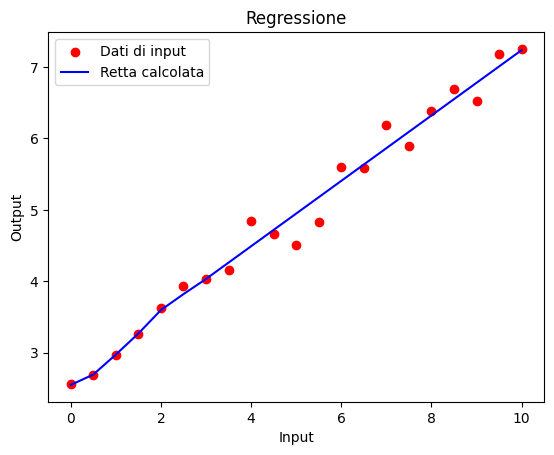

In [ ]:
import matplotlib.pyplot as plt

# Tracciamento del plot
plt.scatter(data[:, 0], data[:, 1], color='red', label='Dati di input')
plt.plot(x_train.numpy(), predicted.numpy(), color='blue', label='Retta calcolata')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Regressione')
plt.legend()
plt.show()


In [ ]:
# Salva l'immagine del grafico della rete neurale con i pesi
dummy_input = torch.randn(1, 1)
output = net(dummy_input)
dot = make_dot(output, params=dict(net.named_parameters()))
dot.format = 'png'
dot.render('/content/drive/MyDrive/symbolic_custom_layer/network_graph')


'/content/drive/MyDrive/symbolic_custom_layer/network_graph.png'

TypeError: ignored

#NA LINEAR REGRESSION

Note :

Cosa serve **unsqueeze** :

Questa operazione è necessaria nel contesto del custom layer per garantire che le dimensioni dei tensori siano compatibili durante la moltiplicazione tra i pesi e i valori di input. I pesi hanno una forma di (1, input_size), mentre il tensore x[:, 0] ha una forma di (batch_size, 1). Pertanto, la forma dei due tensori sarà compatibile per la moltiplicazione elemento per elemento.

In [ ]:
# Preparazione dei dati
x_train = torch.tensor(data_na[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data_na[:, 1], dtype=torch.float32).unsqueeze(1) #parte standard (1 problema)
y2_train = torch.tensor(data_na[:, 2], dtype=torch.float32).unsqueeze(1) #parte infinitesima (2 problema)

In [ ]:
#custom layer
#batch size = 1
#input size = 10 se il mio hidden layer ha 10 neuroni
class CustomNASingleNeuronLayer(nn.Module):
    def __init__(self, input_size):
        super(CustomNASingleNeuronLayer, self).__init__()
        self.weight1 = nn.Parameter(torch.randn(1, input_size))
        self.weight2 = nn.Parameter(torch.randn(1, input_size))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        output = x[:, 0].unsqueeze(1) * self.weight1 + x[:, 1].unsqueeze(1) * self.weight2 + self.bias
        return output

Ultimo layer NA

In [ ]:
#definizione della dnn con il layer custom
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 10)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.custom_layer = CustomNASingleNeuronLayer(10)  # Custom layer come output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.custom_layer(x)  # Passaggio attraverso il custom layer
        return x

# Creazione della rete neurale
net = NeuralNet()


In [ ]:
#mse calcolata in base al monosemia
#custom mse
import torch
import torch.nn as nn

class CustomMSELoss(nn.Module):
    def __init__(self, monosemio):
        super(CustomMSELoss, self).__init__()
        self.monosemio = monosemio

    def forward(self, input, target , target1):
        if self.monosemio == 1:
            #target parte intera
            loss = torch.mean(torch.pow((input[:, 0] - target), 2))  # Considera solo il valore associato al weight1
        elif self.monosemio == 2:
            loss = torch.mean(torch.pow((input[:, 1] - target1), 2))  # Considera solo il valore associato al weight2
            raise ValueError("Il valore di monosemio deve essere 1, 2 o 3.")
        return loss


#criterio
monosemio = 2  # Sostituisci con il valore desiderato (1, 2 o 3) in base a che monosemio voglio applicare la loss
criterion = CustomMSELoss(monosemio)

#fare la loss
loss = criterion(outputs, y_train)  # Calcolo della perdita con la custom loss

In [ ]:
# Addestramento della rete neurale
num_epochs_per_monosemio = 1000
threshold = 1e-2

for monosemio in range(1, 3):
    optimizer = optim.SGD(net.parameters(), lr=0.01)  # Reinizializzazione dell'ottimizzatore per ogni monosemio
    epoch = 0
    current_loss = float('inf')
    #se sto elaborando il monosemio = 1 --> loss sulla parte standard
    #se sto elaborando il monosemio = 2 --> loss sul primo infinitesimo
    criterion = CustomMSELoss(monosemio)

    # Elimina il grafo di autograd dai tensori coinvolti prima di partire con il monosemio 2
    if monosemio == 2 and epoch==0 :
      old_gradient = net.input.weight.grad
      net.hidden.weight1.detach_()
      net.hidden.bias.detach_()
      net.input.weight.detach_()
      net.input.bias.detach_()

    while epoch < num_epochs_per_monosemio and current_loss > threshold:
        
        if monosemio == 1:
            optimizer.zero_grad()  # Azzeramento dei gradienti
            outputs = net(x_train)  # Calcolo delle predizioni
            loss = criterion(outputs, y_train, y2_train)  # Calcolo della perdita con la custom loss
            loss.backward()  # Calcolo dei gradienti utilizzando la backward pass

            optimizer.step(params=[net.hidden.weight1, net.hidden.bias])  # Aggiornamento dei pesi del custom layer
            optimizer.step(params=[net.input.weight, net.input.bias])  # Aggiornamento dei pesi dell'input layer

        elif monosemio == 2:
            optimizer.zero_grad()  # Azzeramento dei gradienti
            outputs = net(x_train)  # Calcolo delle predizioni
            loss = criterion(outputs, y_train, y2_train)  # Calcolo della perdita con la custom loss
            loss.backward()  # Calcolo dei gradienti utilizzando la backward pass
            
            # Proiezione ortogonale del nuovo gradiente sul vecchio gradiente
            new_grad = net.input.weight.grad
            # Proiezione ortogonale
            projection = new_grad - torch.dot(new_grad, old_grad) * old_grad / torch.dot(old_grad, old_grad)  
           
            # Aggiornamento dei pesi dell'input layer utilizzando il gradiente proiettato
            net.input.weight.grad = projection  # Assegna il gradiente proiettato al gradiente dell'input layer

            # Aggiornamento solo di weight2
            optimizer.step(params=[net.hidden.weight2, net.hidden.bias])  # Aggiornamento solo di weight2
            optimizer.step(params=[net.input.weight, net.input.bias])

        else:
            raise ValueError("Il valore di monosemio deve essere compreso tra 1 e 2.")

        current_loss = loss.item()
        epoch += 1

        if epoch % 100 == 0:
            print(f'Monosemio: {monosemio}, Epoch {epoch}/{num_epochs_per_monosemio}, Loss: {current_loss:.4f}')



#TEST